In [524]:
import os
import sys
import subprocess
from pathlib import Path

repo_root = subprocess.run(
    ["git", "rev-parse", "--show-toplevel"], capture_output=True, text=True
).stdout.strip()

sys.path.append(repo_root)

In [525]:
import numpy as np

from matplotlib import pyplot as plt

import json

import utils

from modules import helpers, fitting

import importlib
importlib.reload(utils)
importlib.reload(helpers)
importlib.reload(fitting)

helpers.set_plot_configs()

In [526]:
DataReader = utils.MCAData()

bins, counts, _, _ = DataReader._read_data('data/2025-03-04/scatter_90_0304.Spe')
count_normalizing_factor = np.sum(counts) * (bins[1] - bins[0])
kde_bins, kde, kde_err = DataReader._kde_smooth_data(bins, counts, bw=5)
peaks_idx, valleys_idx = DataReader._find_peaks_and_valleys(kde_bins, kde, kde_err)

In [527]:
calibration = utils.MCACalibration('data/2025-03-04/Calibration_recoil_na_0304.Spe',
                                   'data/2025-03-04/Calibration_recoil_ba_0304.Spe',
                                   cs_137_approx_line_bin=1800,)
print(calibration.energy_scaler,calibration.energy_scaler_err,calibration.energy_scaler_mse)

0.3709574594969141 0.014022329491394375 0.0014899282176228038


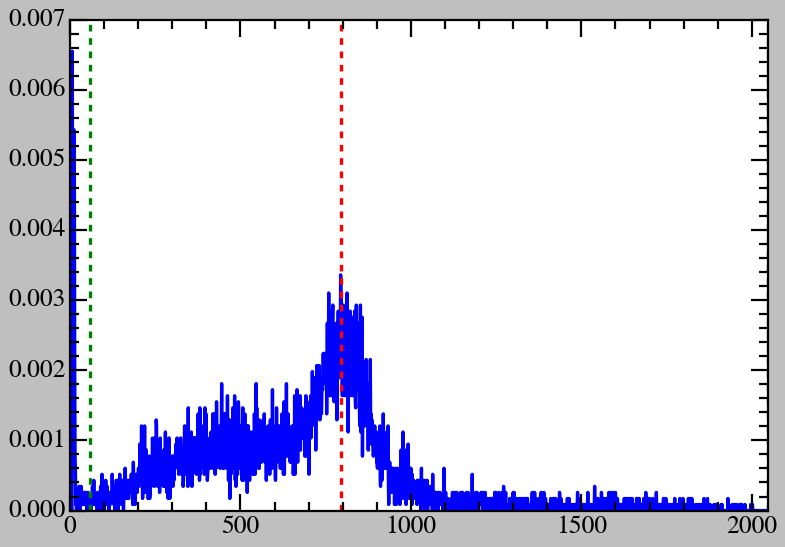

In [528]:
fig, ax = plt.subplots(figsize=(10, 7))

ax.plot(bins, counts/count_normalizing_factor)
# ax.plot(kde_bins, kde)
# ax.errorbar(kde_bins, kde, yerr=kde_err,
#             fmt=' s',markersize=1,elinewidth=2,capsize=5)

for peak_idx in peaks_idx:
    ax.axvline(kde_bins[peak_idx], color='r', linestyle='--')
for valley_idx in valleys_idx:
    ax.axvline(kde_bins[valley_idx], color='g', linestyle='--')

# for fitting_bins, gaussian_counts in zip(calibration.ba_133_fitting_bins+[calibration.cs_137_fitting_bins],
#                                          calibration.ba_133_fitted_counts+[calibration.cs_137_fitted_counts]):
#     if fitting_bins is not None:
#         ax.plot(fitting_bins, gaussian_counts/count_normalizing_factor, color='r')

# ax.plot(calibration.na_22_fitting_bins, calibration.na_22_fitted_counts/count_normalizing_factor, color='r')

ax.set_xscale('linear')
# ax.set_yscale('log')

ax.set_xlim(0, 2048)
# ax.set_ylim(1e-5, 2e-3)

plt.tight_layout()
plt.show()

In [529]:
np.concatenate(calibration.ba_133_energies)

array([ 53.15,  79.6 ,  81.  , 160.61, 276.4 , 302.85, 356.01])

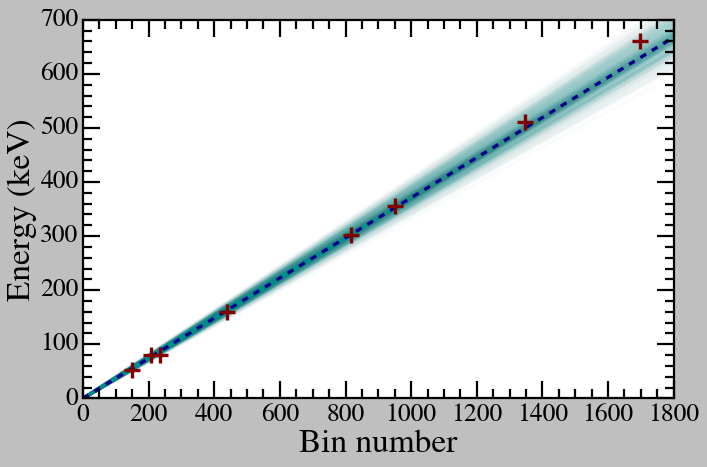

In [530]:
fig, ax = plt.subplots(figsize=(9, 6))

ax.scatter(calibration.calib_bins, calibration.calib_energies, marker='+', s=200, color='maroon', zorder=-1)

bins_dense = np.linspace(0, 1800, 1000)
ax.plot(bins_dense, calibration.energy_scaler*bins_dense, color='darkblue', ls='--',zorder=-2)

for i in range(500):
    scaler = np.random.normal(calibration.energy_scaler,calibration.energy_scaler_err)

    ax.plot(bins_dense, scaler*bins_dense, color='darkcyan', alpha=0.01, zorder=-3)

ax.set_xlabel('Bin number')
ax.set_ylabel('Energy (keV)')

ax.set_xlim(0, 1800)
ax.set_ylim(0, 700)

plt.tight_layout()
plt.show()